<a href="https://colab.research.google.com/github/edferreira1/FarmTechFase5_Ed_Alex_Ric/blob/main/C%C3%B3pia_de_EdmarFerreiraDeSouza_rm560406_pbl_fase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### 1. *Importando as bibliotecas de python*

# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Carregando os dados do arquivo
cropy_yeld_data = pd.read_csv('crop_yield.csv')
cropy_yeld_data






,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800
...,...,...,...,...,...,...
151,"Rubber, natural",2308.51,18.27,83.65,26.47,6721
152,"Rubber, natural",2410.13,18.58,83.45,26.81,6248
153,"Rubber, natural",2967.41,18.67,85.48,26.46,6842
154,"Rubber, natural",2333.46,18.50,84.85,26.43,5571


In [ ]:
cropy_yeld_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


In [ ]:
# Exibindo as primeiras linhas do dataset
data.head()

# Descrição estatística das variáveis numéricas
data.describe()



,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


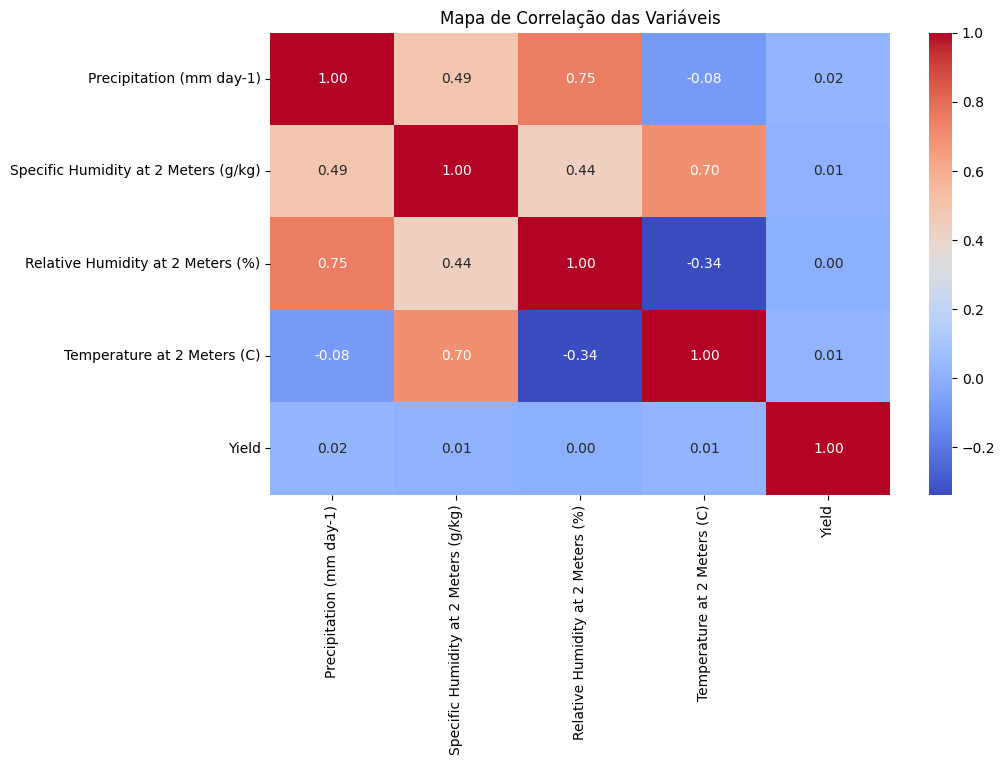

In [ ]:
# Excluir colunas não numéricas antes de calcular a correlação
numeric_data = data.select_dtypes(include=[np.number])

# Calculando e visualizando a correlação
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de Correlação das Variáveis")
plt.show()

In [ ]:
# Separando as variáveis independentes (X) e a variável dependente (y)
X = data[['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
          'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']]
y = data['Yield']


# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Fazendo previsões
y_pred = lr_model.predict(X_test)

# Avaliação do modelo
print("Métricas de Regressão Linear:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

Métricas de Regressão Linear:
MAE: 55423.34851941909
MSE: 4162255539.8433723
R2: -0.07303066291166038


In [ ]:
# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


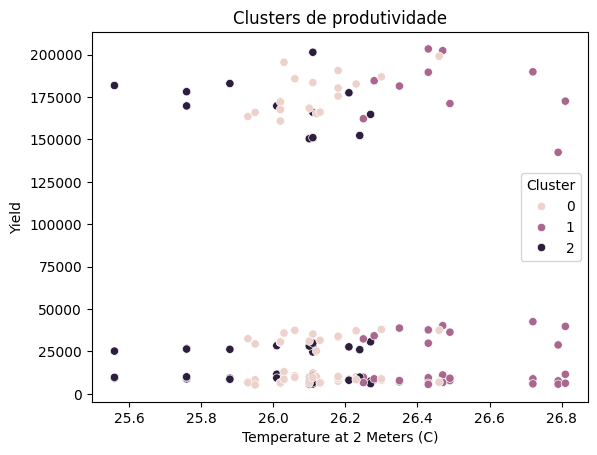

In [ ]:
# Clusterização (ML não supervisionado)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)
sns.scatterplot(x=data['Temperature at 2 Meters (C)'], y=data['Yield'], hue=data['Cluster'])
plt.title("Clusters de produtividade")
plt.show()

In [ ]:
# Separando os dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Escolha dos modelos preditivos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "SVR": SVR(kernel='rbf'),
}

In [ ]:
# Treinamento e avaliação
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(f"R²: {r2_score(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")



Linear Regression:
R²: -0.0730
RMSE: 64515.5449
MAE: 55423.3485

Random Forest:
R²: -0.9099
RMSE: 86071.8686
MAE: 72235.5504

XGBoost:
R²: -1.1978
RMSE: 92331.9618
MAE: 75914.2656

SVR:
R²: -0.3111
RMSE: 71314.4273
MAE: 38974.9177


In [ ]:
# Salvar o dataset modificado
data.to_csv("crop_yield_processed.csv", index=False)